# Adult Census Income

In [1]:
#import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import string
import nltk

from sklearn.naive_bayes import MultinomialNB
from sklearn import model_selection
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.utils.multiclass import unique_labels
from sklearn.preprocessing import LabelBinarizer, OrdinalEncoder, OneHotEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

## Data Extraction

In [2]:
adult = pd.read_csv('adult.csv')
df = pd.DataFrame(adult)

In [3]:
df.shape

(32561, 15)

In [4]:
df.head()

age workclass  fnlwgt     education  education_num marital_status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital_gain  \
0                  ?  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                  ?      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital_loss  hours_per_week native_country income  
0          4356              40  United-States  <=50K  
1          4356              18  United-States  <=50K  
2          4356              40  United-States  <=50K  
3          3900              40  United-States  <=50K  
4          3900              40  United-States  <=50K

In [5]:
df.describe()

age        fnlwgt  education_num  capital_gain  capital_loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours_per_week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## Naive Bayes Model

In [7]:
#first target classification
a = df.drop(['age', 'sex', 'hours_per_week', 'income'], axis=1)
a.head(20)

workclass  fnlwgt     education  education_num marital_status  \
0                  ?   77053       HS-grad              9        Widowed   
1            Private  132870       HS-grad              9        Widowed   
2                  ?  186061  Some-college             10        Widowed   
3            Private  140359       7th-8th              4       Divorced   
4            Private  264663  Some-college             10      Separated   
5            Private  216864       HS-grad              9       Divorced   
6            Private  150601          10th              6      Separated   
7          State-gov   88638     Doctorate             16  Never-married   
8        Federal-gov  422013       HS-grad              9       Divorced   
9            Private   70037  Some-college             10  Never-married   
10           Private  172274     Doctorate             16       Divorced   
11  Self-emp-not-inc  164526   Prof-school             15  Never-married   
12           Private  129177     Bachelors             13        Widowed   
13           Private  136204       Masters             14      Separated   
14                 ?  172175     Doctorate             16  Never-married   
15           Private   45363   Prof-school             15       Divorced   
16           Private  172822          11th              7       Divorced   
17           Private  317847       Masters             14       Divorced   
18           Private  119592    Assoc-acdm             12  Never-married   
19           Private  203034     Bachelors             13      Separated   

           occupation    relationship   race  capital_gain  capital_loss  \
0                   ?   Not-in-family  White             0          4356   
1     Exec-managerial   Not-in-family  White             0          4356   
2                   ?       Unmarried  Black             0          4356   
3   Machine-op-inspct       Unmarried  White             0          3900   
4      Prof-specialty       Own-child  White             0          3900   
5       Other-service       Unmarried  White             0          3770   
6        Adm-clerical       Unmarried  White             0          3770   
7      Prof-specialty  Other-relative  White             0          3683   
8      Prof-specialty   Not-in-family  White             0          3683   
9        Craft-repair       Unmarried  White             0          3004   
10     Prof-specialty       Unmarried  Black             0          3004   
11     Prof-specialty   Not-in-family  White             0          2824   
12      Other-service   Not-in-family  White             0          2824   
13    Exec-managerial   Not-in-family  White             0          2824   
14                  ?   Not-in-family  White             0          2824   
15     Prof-specialty   Not-in-family  White             0          2824   
16   Transport-moving   Not-in-family  White             0          2824   
17    Exec-managerial   Not-in-family  White             0          2824   
18  Handlers-cleaners   Not-in-family  Black             0          2824   
19              Sales   Not-in-family  White             0          2824   

   native_country  
0   United-States  
1   United-States  
2   United-States  
3   United-States  
4   United-States  
5   United-States  
6   United-States  
7   United-States  
8   United-States  
9               ?  
10  United-States  
11  United-States  
12  United-States  
13  United-States  
14  United-States  
15  United-States  
16  United-States  
17  United-States  
18              ?  
19  United-States

In [8]:
#Second target classification
b = df['income']
b.head(20)

0     <=50K
1     <=50K
2     <=50K
3     <=50K
4     <=50K
5     <=50K
6     <=50K
7      >50K
8     <=50K
9      >50K
10     >50K
11     >50K
12     >50K
13     >50K
14     >50K
15     >50K
16     >50K
17     >50K
18     >50K
19     >50K
Name: income, dtype: object

In [9]:
#transform first target data
first = OneHotEncoder()
X = first.fit_transform(a)
print(X)
print(X.shape)

  (0, 0)	1.0
  (0, 2658)	1.0
  (0, 21668)	1.0
  (0, 21681)	1.0
  (0, 21695)	1.0
  (0, 21696)	1.0
  (0, 21712)	1.0
  (0, 21721)	1.0
  (0, 21722)	1.0
  (0, 21932)	1.0
  (0, 21972)	1.0
  (1, 4)	1.0
  (1, 6523)	1.0
  (1, 21668)	1.0
  (1, 21681)	1.0
  (1, 21695)	1.0
  (1, 21700)	1.0
  (1, 21712)	1.0
  (1, 21721)	1.0
  (1, 21722)	1.0
  (1, 21932)	1.0
  (1, 21972)	1.0
  (2, 0)	1.0
  (2, 11184)	1.0
  (2, 21672)	1.0
  :	:
  (32558, 21722)	1.0
  (32558, 21841)	1.0
  (32558, 21972)	1.0
  (32559, 4)	1.0
  (32559, 7892)	1.0
  (32559, 21668)	1.0
  (32559, 21681)	1.0
  (32559, 21695)	1.0
  (32559, 21697)	1.0
  (32559, 21715)	1.0
  (32559, 21721)	1.0
  (32559, 21722)	1.0
  (32559, 21841)	1.0
  (32559, 21972)	1.0
  (32560, 4)	1.0
  (32560, 12890)	1.0
  (32560, 21668)	1.0
  (32560, 21681)	1.0
  (32560, 21693)	1.0
  (32560, 21697)	1.0
  (32560, 21714)	1.0
  (32560, 21721)	1.0
  (32560, 21722)	1.0
  (32560, 21841)	1.0
  (32560, 21972)	1.0
(32561, 21975)


In [10]:
#transform second target classification
second = LabelBinarizer()
y = second.fit_transform(b)
print(y)

[[0]
 [0]
 [0]
 ...
 [1]
 [0]
 [0]]


In [11]:
#training & testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(19536, 21975)
(19536, 1)
(13025, 21975)
(13025, 1)


In [12]:
#generate model
nb = MultinomialNB().fit(X_train, np.ravel(y_train, order='C'))
print(nb)

MultinomialNB()


In [13]:
#prediction
pred = nb.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print(pred)
print(accuracy)

[0 1 0 ... 1 0 0]
0.8598080614203455


In [14]:
#confusion matrix
print(confusion_matrix(y_test, pred))

[[9339  482]
 [1344 1860]]


## Visualization

In [15]:
#distribution
plt.figure(figsize=(10,6))
sns.distplot(df.fnlwgt)
plt.title("Final Weight of Adult")
plt.show()

c:\users\bayu\opencv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

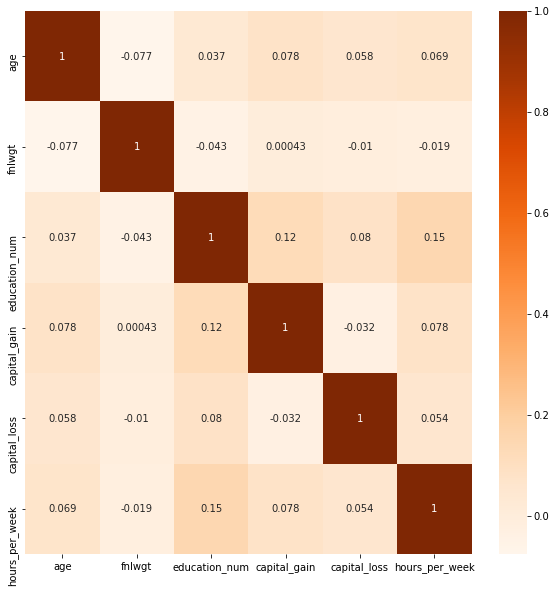

In [16]:
#heatmap correlation
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap="Oranges")

In [17]:
df.sex.value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

c:\users\bayu\opencv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


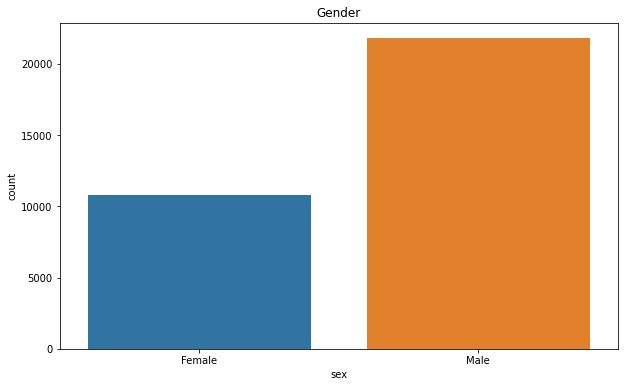

In [18]:
#print('countplot of gender')
plt.figure(figsize=(10,6))
sns.countplot(df.sex)
plt.title("Gender")
plt.show()

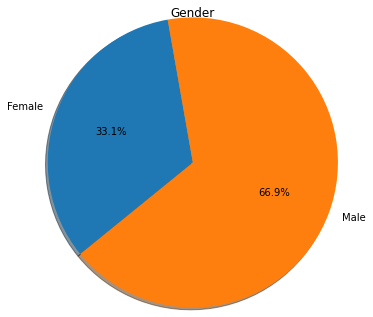

In [19]:
#print('pie chart of gender')
plt.figure(figsize=(5,6))
gender = [np.count_nonzero(df['sex'] == "Female"),
         np.count_nonzero(df['sex'] == "Male")]
activities = ['Female', 'Male']
plt.title("Gender")
plt.pie(gender, labels=activities, radius=1.3, startangle=100, autopct='%.1f%%', shadow=True)
plt.show()

In [20]:
gender_income = df.groupby(['sex', 'income']).size().reset_index(name = "Count")
gender_income

sex income  Count
0  Female  <=50K   9592
1  Female   >50K   1179
2    Male  <=50K  15128
3    Male   >50K   6662

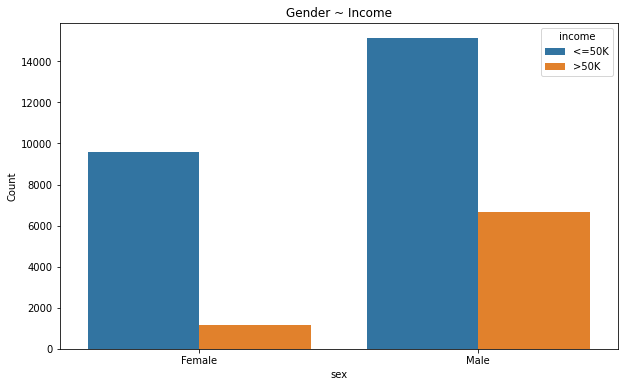

In [21]:
plt.figure(figsize=(10,6))
sns.barplot(x='sex', y='Count', hue='income', data=gender_income)
plt.title("Gender ~ Income")
plt.show()